In [21]:
import plotly.express as px
import pandas as pd

In [22]:
df = pd.read_csv('all_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_name             1262 non-null   object 
 1   name                     1091 non-null   object 
 2   url                      1091 non-null   object 
 3   industry                 900 non-null    object 
 4   headquarters             1080 non-null   object 
 5   rating                   1055 non-null   float64
 6   company_size             1018 non-null   float64
 7   reviews_count            1091 non-null   float64
 8   jobs_count               1091 non-null   float64
 9   salaries_count           1091 non-null   float64
 10  id                       1262 non-null   int64  
 11  company                  1262 non-null   object 
 12  contract                 669 non-null    object 
 13  created_at               1262 non-null   object 
 14  industry_1              

In [23]:
df.head()

,company_name,name,url,industry,headquarters,rating,company_size,reviews_count,jobs_count,salaries_count,...,stack,text,title,url_1,id_1,is_relevant_score,seniority_score,is_same_glassdoor_score,rating_score,total_score
0,Cgi,CGI,https://www.glassdoor.com/Overview/Working-at-...,Business Consulting\n,"Fairfax, VA",3.9,15000.0,17000.0,2000.0,33000.0,...,['Ataccama'],"Description de poste A Lille, nos équipes ...",Data Analyst,https://fr.linkedin.com/jobs/view/data-analyst...,2,0,1,1,0.0,2.0
1,Cgi,CGI,https://www.glassdoor.com/Overview/Working-at-...,Business Consulting\n,"Fairfax, VA",3.9,15000.0,17000.0,2000.0,33000.0,...,"['Cassandra', 'Hive', 'Kafka', 'Nifi', 'Python...","Description de poste Big Data, Data Scienc...",Data Engineer Big Data,https://fr.linkedin.com/jobs/view/data-enginee...,3,1,1,1,0.0,3.0
2,Cgi,CGI,https://www.glassdoor.com/Overview/Working-at-...,Business Consulting\n,"Fairfax, VA",3.9,15000.0,17000.0,2000.0,33000.0,...,"['Couchbase', 'HBase', 'Hive', 'Kafka', 'Pytho...","Description de poste Vous rejoignez CGI, l...",Data Engineer - Financial Services,https://fr.linkedin.com/jobs/view/data-enginee...,4,1,1,1,0.0,3.0
3,Cgi,CGI,https://www.glassdoor.com/Overview/Working-at-...,Business Consulting\n,"Fairfax, VA",3.9,15000.0,17000.0,2000.0,33000.0,...,"['Azure', 'Azure Data Factory', 'Docker', 'Kub...","Description de poste Fondée en 1976, CGI f...",Data Engineer Microsoft Azure,https://fr.linkedin.com/jobs/view/data-enginee...,5,1,1,1,0.0,3.0
4,Astek,Astek,https://www.glassdoor.com/Overview/Working-at-...,Information Technology Support Services\n,"Paris, France",3.5,7500.0,1000.0,64.0,2000.0,...,"['Scala', 'Spark', 'Spark SQL']","CDI Paris, France Publiée il y a 3 moi...","Ingénieur Big Data Confirmé – Paris, France",https://fr.linkedin.com/jobs/view/ing%C3%A9nie...,6,1,-1,1,-3.0,-2.0


In [ ]:
df.style.apply('

> **numeric**
> - rating
> - company_size
> - reviews_count
> - jobs_count
> - salaries_count
> - seniority_score
> - rating_score
> - total_score

> **categorical**
> - industry
> - location
> - contract
> - created_at
> - industry
> - location
> - remote
> - stack
> - title
> - is_relevant_score
> - is_same_glassdoor_score

### Rating per views

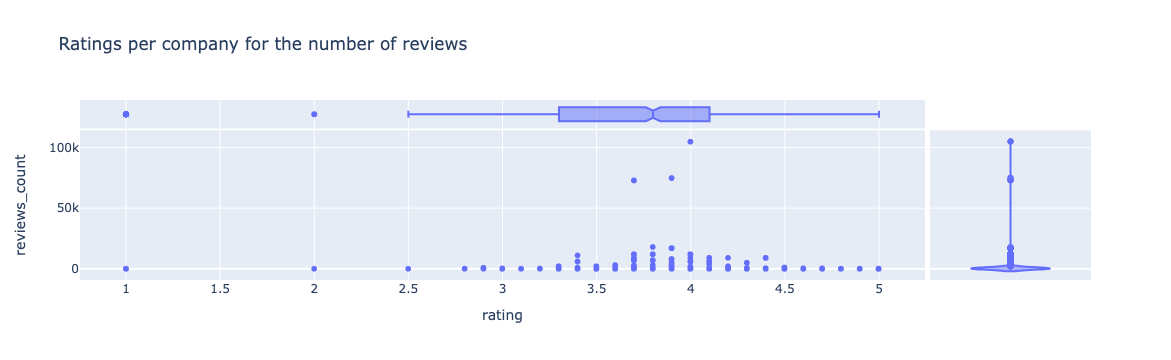

In [24]:
fig = px.scatter(df, x='rating', y='reviews_count', marginal_y="violin",
           marginal_x="box", title='Ratings per company for the number of reviews')
fig.show()

### Rating per reviews_count / company_size

In [65]:
fig = px.scatter(df[df.company_size.notnull()], x="reviews_count", y="rating", size='company_size', 
                 log_x=True, height=800, template='plotly_dark',
                 marginal_x="box", marginal_y="box")
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scattergl.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above